# Import packages, define functions, load, data

In [28]:
from plotnine import *
from mizani.formatters import comma_format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def sorting(df,col,sorter='x'):
    df.sort_values(col, ascending=False, inplace=True)
    df[sorter] = df.reset_index().index + 1

In [10]:
df_wikis = pd.read_csv('raw/Node sizes.csv',index_col=0)
df_wikis

,x,Language,Language (local),Wiki,Articles,All pages,Edits,Admins,Users,Active users,Files,Depth
0,0,English,English,en,6671977,58390201,1156307364,898,45730862,117087,905115,1189
1,1,German,Deutsch,de,2810494,7755162,233223523,180,4172723,17140,127766,93
2,2,French,français,fr,2530286,12605492,204855286,152,4684236,17667,71219,257
3,3,Dutch,Nederlands,nl,2124993,4540891,64365222,34,1282663,3859,20,18
4,4,Russian,русский,ru,1923062,7717296,130862850,72,3406128,10449,243980,153
...,...,...,...,...,...,...,...,...,...,...,...,...
312,312,Sango,Sängö,sg,316,1991,20717,2,6357,10,0,292
313,313,Tigrinya,ትግርኛ,ti,252,2801,24288,2,9097,16,0,887
314,314,Kalaallisut,kalaallisut,kl,243,2303,74820,3,12956,9,0,2334
315,315,Dzongkha,ཇོང་ཁ,dz,237,2624,30200,1,9959,9,0,1167


In [16]:
df_connections = pd.read_csv('raw/Edges.csv',index_col=0)
df_connections

,lang_1,lang_2,weight
0,English,German,3885
1,English,French,4702
2,English,Dutch,2686
3,English,Russian,2050
4,English,Spanish,2866
...,...,...,...
185,Catalan,Indonesian,10
186,Catalan,Korean,7
187,Serbian,Indonesian,4
188,Serbian,Korean,2


# Plot histogram of languages, active users

In [ ]:
sorting(df_wikis,'Articles')

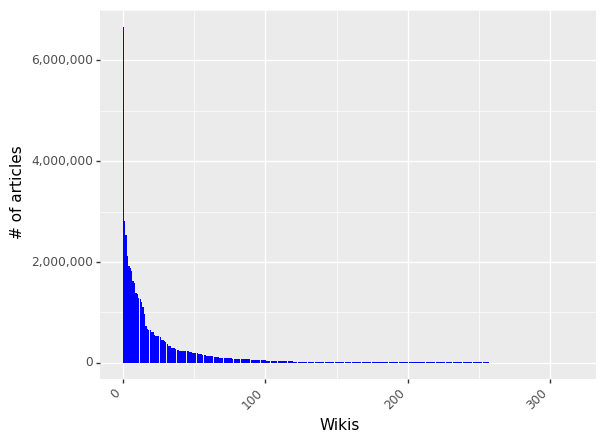

/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: out/Distribution of Wikis by nr of articles.png


In [12]:
plot = (
    ggplot(df_wikis, aes(x='x', y='Articles'))
    + geom_col(fill='blue')
    + labs(x='Wikis', y='# of articles')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + scale_y_continuous(labels=comma_format())
)
print(plot)
ggsave(plot, filename='out/Distribution of Wikis by nr of articles.png', dpi=300)

In [13]:
sorting(df_wikis,'Active users')

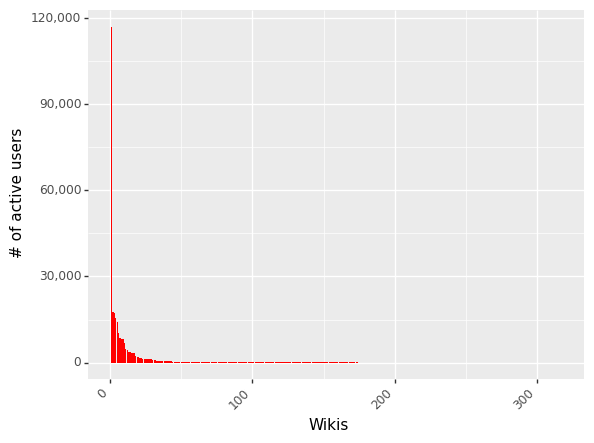

/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: out/Distribution of Wikis by active users.png


In [14]:
plot = (
    ggplot(df_wikis, aes(x='x', y='Active users'))
    + geom_col(fill='red')
    + labs(x='Wikis', y='# of active users')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + scale_y_continuous(labels=comma_format())
)
print(plot)
ggsave(plot, filename='out/Distribution of Wikis by active users.png', dpi=300)

# Plot network statistics (couples of languages)

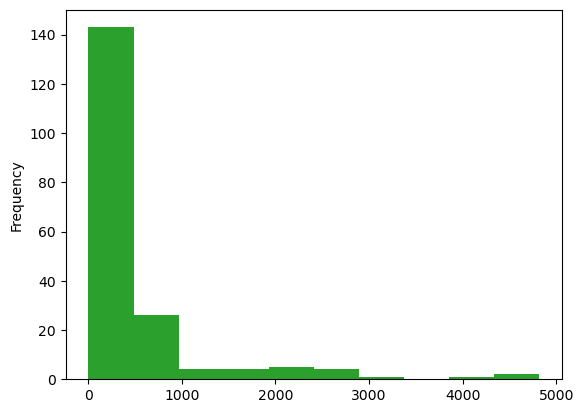

In [29]:
df_connections.weight.plot(kind='hist')
plt.show()
plt.

In [31]:
df_connections['weight_group'] = pd.cut(df_connections['weight'], bins=[0,1000,2000,3000,4000,5000])

In [33]:
plot = (
    ggplot(df_connections, aes('lang_1', 'lang_2', fill='weight'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='weight', color='weight_group'), size=9, show_legend=False)
 + scale_color_manual(['white', 'black']) # new
 + scale_y_discrete(limits=months[::-1])          # new
 + theme(                                         # new
     axis_ticks=element_blank(),
     panel_background=element_rect(fill='white')
 )
)
print(plot)

NameError: name 'months' is not defined